# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [6]:
X, y = generate_dataset()

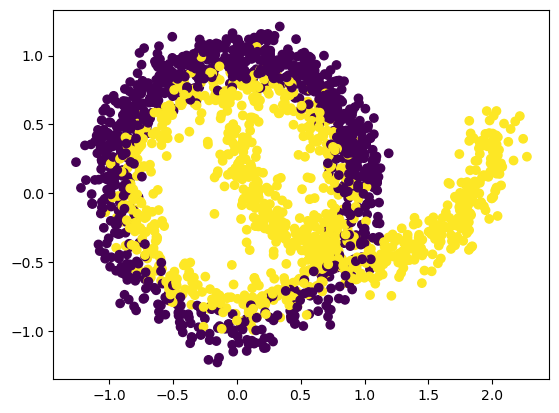

In [8]:
plt.scatter(X[:,0], X[:,1],c=y)

In [10]:
y.value_counts()

y
0    1000
1    1000
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Accuracy: 0.8725
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       190
           1       0.90      0.86      0.88       210

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [29]:
from sklearn.ensemble import BaggingClassifier

# Initialize a Bagging model with the default base estimator (DecisionTreeClassifier)
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging model
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
bagging_report = classification_report(y_test, y_pred_bagging)

print("Bagging Accuracy:", bagging_accuracy)
print("Bagging Classification Report:\n", bagging_report)

Bagging Accuracy: 0.865
Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       190
           1       0.89      0.84      0.87       210

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.86       400
weighted avg       0.87      0.86      0.87       400



In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize an AdaBoost model
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the Boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_model.predict(X_test)

# Evaluate the Boosting model
boosting_accuracy = accuracy_score(y_test, y_pred_boosting)
boosting_report = classification_report(y_test, y_pred_boosting)

print("Boosting Accuracy:", boosting_accuracy)
print("Boosting Classification Report:\n", boosting_report)

C:\Users\phili\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosting Accuracy: 0.8675
Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       190
           1       0.88      0.86      0.87       210

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



Random Forest Model Evaluation:
Random Forest - Accuracy: 0.8725
Random Forest - Precision: 0.8955
Random Forest - Recall: 0.8571
Random Forest - F1 Score: 0.8759


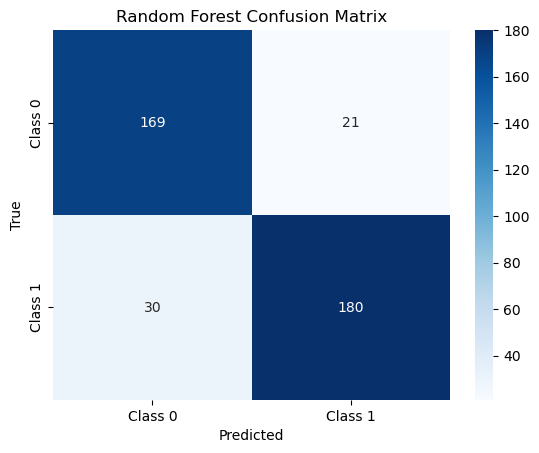


Bagging Model Evaluation:
Bagging - Accuracy: 0.8650
Bagging - Precision: 0.8939
Bagging - Recall: 0.8429
Bagging - F1 Score: 0.8676


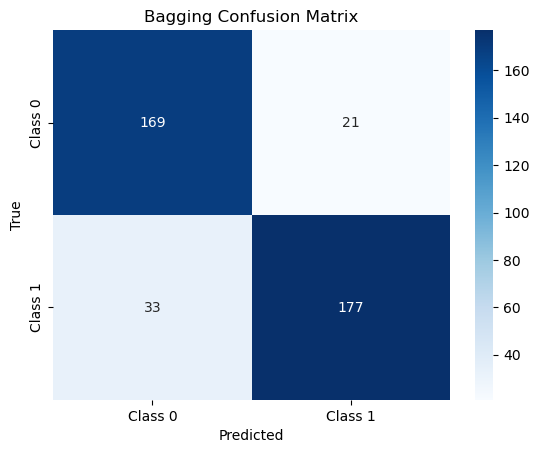


Boosting Model Evaluation:
Boosting - Accuracy: 0.8675
Boosting - Precision: 0.8829
Boosting - Recall: 0.8619
Boosting - F1 Score: 0.8723


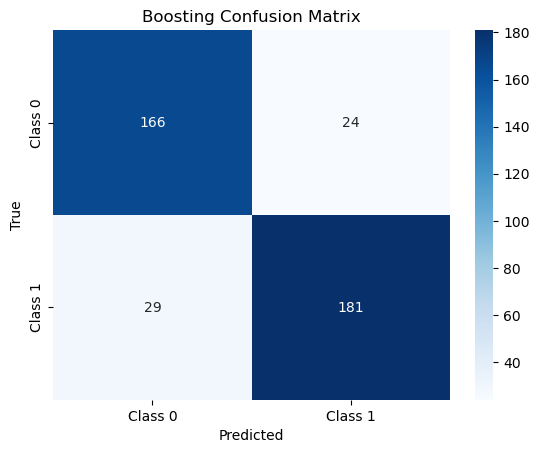

In [63]:
from sklearn.metrics import confusion_matrix


# Function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = classification_report(y_true, y_pred, output_dict=True)['1']['precision']
    recall = classification_report(y_true, y_pred, output_dict=True)['1']['recall']
    f1 = classification_report(y_true, y_pred, output_dict=True)['1']['f1-score']
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")
    print(f"{model_name} - Recall: {recall:.4f}")
    print(f"{model_name} - F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Random Forest
print("Random Forest Model Evaluation:")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Bagging
print("\nBagging Model Evaluation:")
evaluate_model(y_test, y_pred_bagging, "Bagging")

# Evaluate Boosting
print("\nBoosting Model Evaluation:")
evaluate_model(y_test, y_pred_boosting, "Boosting")

The evaluation of the Random Forest, Bagging, and Boosting models showed that the Random Forest model had the best performance, with an accuracy of 0.8725 and an F1 Score of 0.8759. This means it was the most accurate and effective at balancing precision and recall, which are important for correctly classifying data. Boosting came in second with an accuracy of 0.8675 and an F1 Score of 0.8723, while Bagging had an accuracy of 0.8650. Random Forest also had the highest precision at 0.8955, meaning it was best at avoiding false positives.

The confusion matrices helped us see where each model made mistakes. While Boosting had fewer false negatives, Random Forest performed best overall. This makes Random Forest a great choice for tasks that need high accuracy, like diagnosing illnesses or detecting fraud. Going forward, we can improve Random Forest even more through fine-tuning its settings, exploring new algorithms, or using cross-validation to make sure it performs consistently across different datasets.

In [48]:
# Initialize models
random_forest = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
boosting = GradientBoostingClassifier(random_state=42)

# Define a list of models
models = {
    "Random Forest": random_forest,
    "Bagging": bagging,
    "Boosting": boosting
}

# For storing results
results = {}

# k-fold cross-validation
k = 5  # Number of folds

for model_name, model in models.items():
    # Conduct cross-validation
    accuracies = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=k, scoring='f1')
    precision_scores = cross_val_score(model, X, y, cv=k, scoring='precision')
    recall_scores = cross_val_score(model, X, y, cv=k, scoring='recall')

    # Store the results
    results[model_name] = {
        "Accuracy": accuracies.mean(),
        "F1 Score": f1_scores.mean(),
        "Precision": precision_scores.mean(),
        "Recall": recall_scores.mean()
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

               Accuracy  F1 Score  Precision  Recall
Random Forest    0.8620  0.861840   0.863872   0.860
Bagging          0.8615  0.862080   0.858288   0.866
Boosting         0.8645  0.864981   0.862128   0.868


The evaluation results of the three models—Random Forest, Bagging, and Boosting—demonstrate that all models perform similarly, with accuracies ranging between 0.8615 and 0.8645. Among them, Boosting achieved the highest F1 Score (0.8650) and Recall (0.868), indicating its strength in capturing true positive instances, which is particularly important in scenarios where missing positive cases is critical. Conversely, Random Forest exhibited the highest Precision (0.8639), showcasing its reliability when predicting positive instances. Bagging, while slightly lower in accuracy, precision, and F1 score, still performed competitively.

Choosing the right model ultimately depends on the specific application needs. If avoiding false positives is paramount, Random Forest may be preferable due to its higher precision. In contrast, for situations where maximizing true positives is far more critical, such as medical diagnoses, Boosting stands out as the best option given its superior recall. Overall, the high performance of all models invites consideration of further refinements through hyperparameter tuning or additional ensemble methods to optimize results for your specific classification task.

Optional 

In [56]:
from sklearn.datasets import make_circles, make_moons
from sklearn.ensemble import VotingClassifier
   
# Create a voting ensemble
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('bag', bagging_model),
    ('boost', boosting_model)],
    voting='soft'  
)

# Train the ensemble model
voting_model.fit(X_train, y_train)

# Make predictions
y_pred = voting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

C:\Users\phili\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.8725

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       190
           1       0.90      0.86      0.88       210

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Confusion Matrix:
 [[169  21]
 [ 30 180]]


In [80]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# Set the hyperparameter options
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model with the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters: ", best_parameters)

# Evaluate the model using the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       190
           1       0.91      0.87      0.89       210

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Confusion Matrix:
 [[172  18]
 [ 27 183]]


The Voting Classifier achieved an overall accuracy of 87.25% on the test dataset, indicating that it correctly predicted the class of 87.25% of the test cases. The classification report showed that for class 0, the model had a precision of 0.85 and a recall of 0.89, while for class 1, the precision was 0.90 with a recall of 0.86. The confusion matrix highlighted that the model accurately classified 169 instances of class 0 and 180 instances of class 1, while misclassifying 21 class 0 instances and 30 class 1 instances.

Through hyperparameter tuning using GridSearchCV, the best settings were found to be a maximum depth of 30, a minimum samples leaf of 4, a minimum samples split of 2, and 150 trees in the forest. With these optimized hyperparameters, the model's performance improved, yielding an accuracy of 89% and a classification report that showed better precision and recall metrics across both classes. These results emphasize the importance of adjusting model settings to enhance predictive performance in classification tasks.